
# 3a. Clipping to ROI (region of interest)

3.1 Clipping AETI to Region of Interest
To clip raster mapset to a region of interest, a shapefile or the extent coordinate of the ROI is needed.

In [8]:
import os
import shapefile
import glob

dir_mate = "Materials"
ROI_shp     = os.path.join(dir_mate, "Shapefile", "Xinavane_1.shp")
shape = shapefile.Reader(ROI_shp)

shape.bbox

[32.65692516077674, -25.16412729789142, 32.90420244933813, -25.01450956754679]

In [9]:
extent=shape.bbox
xmin,ymin,xmax,ymax=extent[0],extent[1],extent[2],extent[3]
xmin,ymin,xmax,ymax

(32.65692516077674, -25.16412729789142, 32.90420244933813, -25.01450956754679)

In [26]:
dir_proj = os.getcwd()  
dir_data = "Data"

input_fhs = os.path.join(dir_proj, dir_data, "2aL2_AETI_D") 
input_fhs      = glob.glob(input_folder+'\*.tif')

print('Number of files: {0}'.format(len(input_fhs)))
input_fhs

Number of files: 387


['E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0901.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0902.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0903.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0904.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0905.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0906.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0907.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0908.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0909.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0910.tif',


The GDAL excutables gdal_translate can be used to quickly clip a raster file to a given extent. The excuteable can be called in command prompt console when its path is added to the environment variables (installment instruction). Below is an example to clip a raster file in the obtained list of raster handlers. First, the input and output file handlers are defined. Then, using subprocess package to run command line with gdal_translate in python console. 

In [27]:
import os
output_folder=r'E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped'
in_fh=input_fhs[0]
print('in_fh: '+in_fh)
out_fh=os.path.join(output_folder,os.path.split(in_fh)[-1])

import subprocess
string='gdal_translate -of GTiff -ot Float32 -projwin {0} {1} {2} {3} {4} {5}'.format(xmin,ymax,xmax,ymin,in_fh,out_fh)
proc = subprocess.Popen(string, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out, err = proc.communicate()
print(out,err)
print('out_fh: '+out_fh)

in_fh: E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D\L2_AETI_0901.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b''
out_fh: E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0901.tif


In [28]:
for in_fh in input_fhs:
    out_fh=os.path.join(output_folder,os.path.split(in_fh)[-1])
    string='gdal_translate -of GTiff -ot Float32 -projwin {0} {1} {2} {3} {4} {5}'.format(xmin,ymax,xmax,ymin,in_fh,out_fh)
    proc = subprocess.Popen(string, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = proc.communicate()
    print(out,err,out_fh)

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0901.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0902.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0903.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0904.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_0905.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1008.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1009.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1010.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1011.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1012.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1115.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1116.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1117.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1118.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1119.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1223.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1224.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1225.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1226.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1227.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1332.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1333.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1334.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1335.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1336.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1506.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1507.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1508.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1509.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1510.tif
b'Inp

b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1616.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1617.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1618.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1619.tif
b'Input file size is 250, 151\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n' b'' E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1620.tif
b'Inp

b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1713.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1713.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1714.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1714.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1715.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1715.tif
b'Input file size is 250, 151\r\n0' b"ER

b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1808.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1808.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1809.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1809.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1810.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1810.tif
b'Input file size is 250, 151\r\n0' b"ER

b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1835.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1835.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1836.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1836.tif
b'Input file size is 250, 151\r\n0' b"ERROR 4: Attempt to create new tiff file `E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D_clipped\\L2_AETI_1901.tif' failed: No such file or directory\r\n" E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2aL2_AETI_D_clipped\L2_AETI_1901.tif
b'Input file size is 250, 151\r\n0' b"ER

# 3b. Resample Landcover map
## Input data (reference raster/AETI or NPP/, Landcover maps, shapefile)

Landcover class map is only available at Level 2 (100m) so to use this layer to mask NPP and AETI layers, it must be resampled to the same resolution, size, and spatial referencing system of the other layers.

In [57]:
import os
import glob
from osgeo import gdal
from osgeo import ogr
import matplotlib.pyplot as plt

%matplotlib notebook 
#activate interactive plot 

dir_data = "Data"
dir_mate = "Materials"
    
L2_AETI_tif = os.path.join(dir_data, "2aL2_AETI_D", "L2_AETI_0901.tif") 
L2_LCC_tif  = os.path.join(dir_data, "2cL2_LCC_A",      "L2_LCC_09.tif")
ROI_shp     = os.path.join(dir_mate, "Shapefile",       "Xinavane_1.shp")

In [58]:
template_info=gdal.Info(L2_AETI_tif,format='json') ##Read gdal info of template raster file
src_info=gdal.Info(L2_LCC_tif,format='json')       ##Read gdal info of source raster file

inDriver = ogr.GetDriverByName("ESRI Shapefile")   ## will select the driver for shp-file creation.
inDataSource = inDriver.Open(ROI_shp, 1)           ## 1 means writeable. 0 means read-only. 
inLayer = inDataSource.GetLayer()                  ##Get layer from ROI shapefile

resample = 'near' #Selecting resampling method

In [59]:
inLayer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x0000022886364FC0> >

In [60]:
dir_proj = os.getcwd()  
dir_data = "Data"

input_folder = os.path.join(dir_proj, dir_data, "2cL2_LCC_A") 
LCC_fhs      = glob.glob(input_folder+'\*.tif')
LCC_fhs

['E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_09.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_10.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_11.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_12.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_13.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_14.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_15.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_16.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_17.tif',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2cL2_LCC_A\\L2_LCC_18.tif']

In [61]:
LCC_tif=L2_LCC_tif.replace('.tif','_resampled_2.tif') #Resampled LCC tif file 
LCC_tif

'Data\\2cL2_LCC_A\\L2_LCC_09_resampled_2.tif'

In [62]:
LCC_tifs = []

for LCC_fh in LCC_fhs:
    LCC_tif=LCC_fh.replace('.tif','_resampled_2.tif') #Resampled LCC tif file, LCC_tif destination
    
    ds = gdal.Warp(LCC_tif,LCC_fh,format='GTiff',
            cutlineDSName =ROI_shp,  
            cutlineLayer = inLayer.GetName(),
            cropToCutline = False,
            srcSRS=src_info['coordinateSystem']['wkt'],
            dstSRS=template_info['coordinateSystem']['wkt'],
            srcNodata=src_info['bands'][0]['noDataValue'],
            dstNodata=-9999,
            width=template_info['size'][0],
            height=template_info['size'][1],
            outputBounds=(template_info['cornerCoordinates']['lowerLeft'][0],
                            template_info['cornerCoordinates']['lowerLeft'][1],
                            template_info['cornerCoordinates']['upperRight'][0],
                            template_info['cornerCoordinates']['upperRight'][1]),
            outputBoundsSRS=template_info['coordinateSystem']['wkt'],
            resampleAlg=resample,
            options = ["GDALWARP_IGNORE_BAD_CUTLINE YES"])
    ds = None
    LCC_tifs.append(LCC_tif)
    print (LCC_tif)
    print (LCC_fh)

E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_09_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_09.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_10_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_10.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_11_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_11.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_12_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_12.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_13_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_13.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_14_resampled_2.tif
E:\P

In [63]:
for LCC_tif in LCC_tifs:
    print (LCC_tif)

E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_09_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_10_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_11_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_12_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_13_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_14_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_15_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_16_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_17_resampled_2.tif
E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\2cL2_LCC_A\L2_LCC_18_resampled_2.tif


# 3c. Convert shapefile of the project area to tiff
### A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.

In [1]:
import os
import glob
from osgeo import ogr, gdal
import subprocess

In [10]:
# Inport the shapefile and a reference image
dir_proj      = os.getcwd()  
dir_materials = "Materials"
dir_data      = "Data"

InputVector       = os.path.join(dir_proj, dir_materials, "Shapefile") 
InputVectors      = glob.glob(InputVector+'\*.shp')

RefImage         = os.path.join(dir_proj, dir_data, "2aL2_AETI_D") # reference image
RefImages        = glob.glob(RefImage+'\*.tif')

InputVectors[0], RefImages[0]
#InputVector = r"E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Materials\Shapefile\Xinavane_1.shp"

('E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Materials\\Shapefile\\Xinavane_1.shp',
 'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\2aL2_AETI_D\\L2_AETI_0901.tif')

In [5]:
# Specify the directory/folder to save the converted shapefile (in tiff format)
OutputImage = r"E:\Projects\WaterPiP\CaseStudies\Xinavana\WaPORDocker\Data\3ShapeTif\ShpTif.tif"

OutputImage

'E:\\Projects\\WaterPiP\\CaseStudies\\Xinavana\\WaPORDocker\\Data\\3ShapeTif\\ShpTif.tif'

In [11]:
gdalformat = 'GTiff'
datatype = gdal.GDT_Byte
burnVal = 1 #value for the output image pixels
##########################################################
# Get projection info from reference image
Image = gdal.Open(RefImages[0], gdal.GA_ReadOnly)

# Open Shapefile
Shapefile = ogr.Open(InputVectors[0])
Shapefile_layer = Shapefile.GetLayer()

# Rasterise
print("Rasterising shapefile...")
Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=DEFLATE'])
Output.SetProjection(Image.GetProjectionRef())
Output.SetGeoTransform(Image.GetGeoTransform()) 

# Write data to band 1
Band = Output.GetRasterBand(1)
Band.SetNoDataValue(0)
gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])

# Close datasets
Band = None
Output = None
Image = None
Shapefile = None

# Build image overviews
subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
print("Done.")

Rasterising shapefile...
Done.


# 3d. Open AETI raster and mask using Land Cover map and Project area
Using Land Cover map (LCC), we can mask out the pixels that do not represent crop cover and only calculate water productivity for the crop pixels. In WaPOR LCC layer, pixel value **41** represents rainfed cropland and **42** irrigated cropland (See https://wapor.apps.fao.org/catalog/2/L2_LCC_A). Thus, pixel values other than 41 and 43 need to be masked out.

In [26]:
import numpy as np
def OpenAsArray(fh, bandnumber = 1, dtype = 'float32', nan_values = True):
    """
    Open a map as an numpy array. 
    
    Parameters
    ----------
    fh: str
        Filehandle to map to open.
    bandnumber : int, optional 
        Band or layer to open as array, default is 1.
    dtype : str, optional
        Datatype of output array, default is 'float32'.
    nan_values : boolean, optional
        Convert he no-data-values into np.nan values, note that dtype needs to
        be a float if True. Default is False.
        
    Returns
    -------
    Array : ndarray
        Array with the pixel values.
    """
    datatypes = {"uint8": np.uint8, "int8": np.int8, "uint16": np.uint16, "int16":  np.int16, "Int16":  np.int16, "uint32": np.uint32,
    "int32": np.int32, "float32": np.float32, "float64": np.float64, "complex64": np.complex64, "complex128": np.complex128,
    "Int32": np.int32, "Float32": np.float32, "Float64": np.float64, "Complex64": np.complex64, "Complex128": np.complex128,}
    DataSet = gdal.Open(fh, gdal.GA_ReadOnly)
    Type = DataSet.GetDriver().ShortName
    if Type == 'HDF4':
        Subdataset = gdal.Open(DataSet.GetSubDatasets()[bandnumber][0])
        NDV = int(Subdataset.GetMetadata()['_FillValue'])
    else:
        Subdataset = DataSet.GetRasterBand(bandnumber)
        NDV = Subdataset.GetNoDataValue()
    Array = Subdataset.ReadAsArray().astype(datatypes[dtype])
    if nan_values:
        Array[Array == NDV] = np.nan
    return Array

In [27]:
from osgeo import ogr, gdal
import matplotlib.pyplot as plt
%matplotlib notebook 

dir_data = "Data"
    
L2_AETI_tif = os.path.join(dir_data, "2aL2_AETI_D", "L2_AETI_0901.tif") 
L2_LCC_tif  = os.path.join(dir_data, "2cL2_LCC_A",      "L2_LCC_09.tif")
ProAtif     = os.path.join(dir_data, "3ShapeTif",       "ShpTif.tif")

<IPython.core.display.Javascript object>


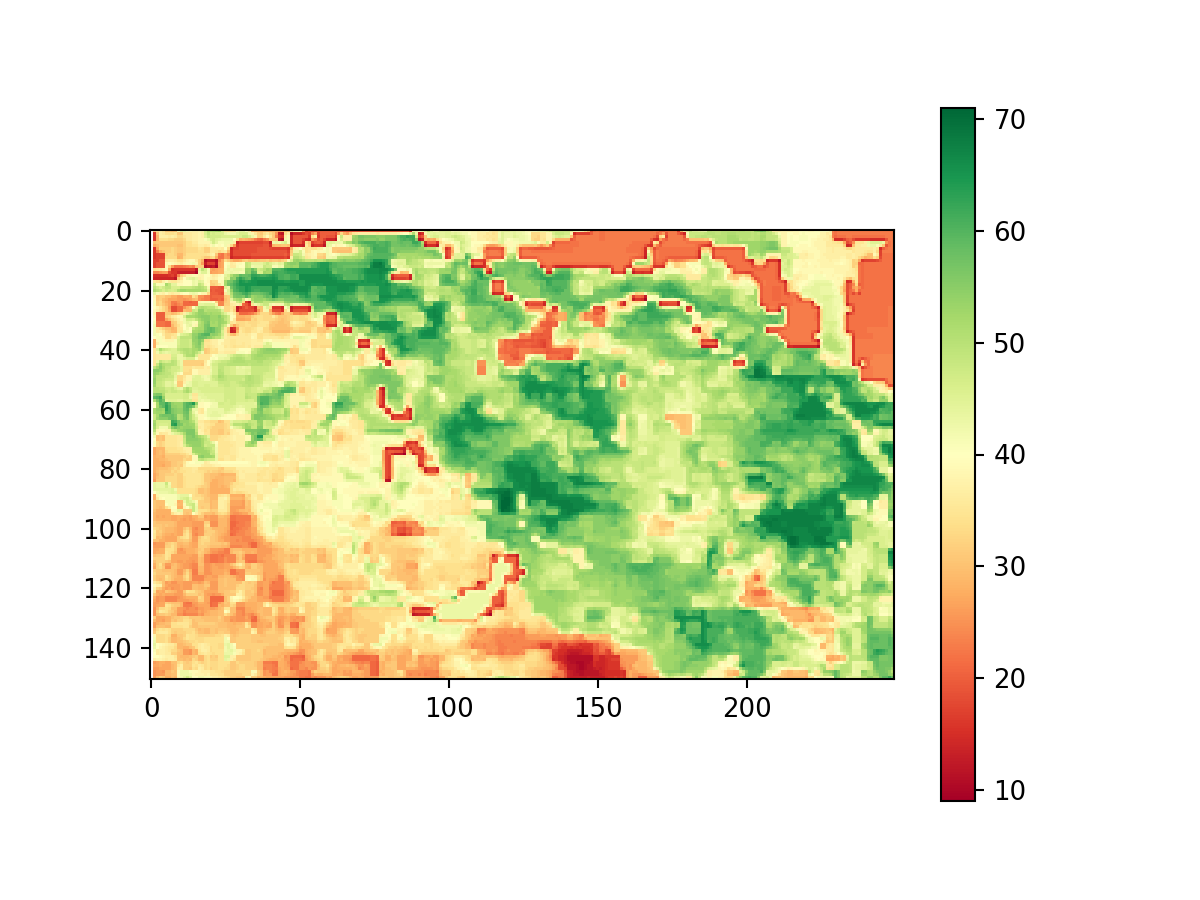

In [28]:
# Plot AETI 
AETI=OpenAsArray(L2_AETI_tif,nan_values=True)
plt.imshow(AETI, cmap='RdYlGn')
plt.colorbar()
plt.show()

In [15]:
L2_LCC_tif, L2_AETI_tif

('Data\\2cL2_LCC_A\\L2_LCC_09.tif', 'Data\\2aL2_AETI_D\\L2_AETI_0901.tif')

<IPython.core.display.Javascript object>


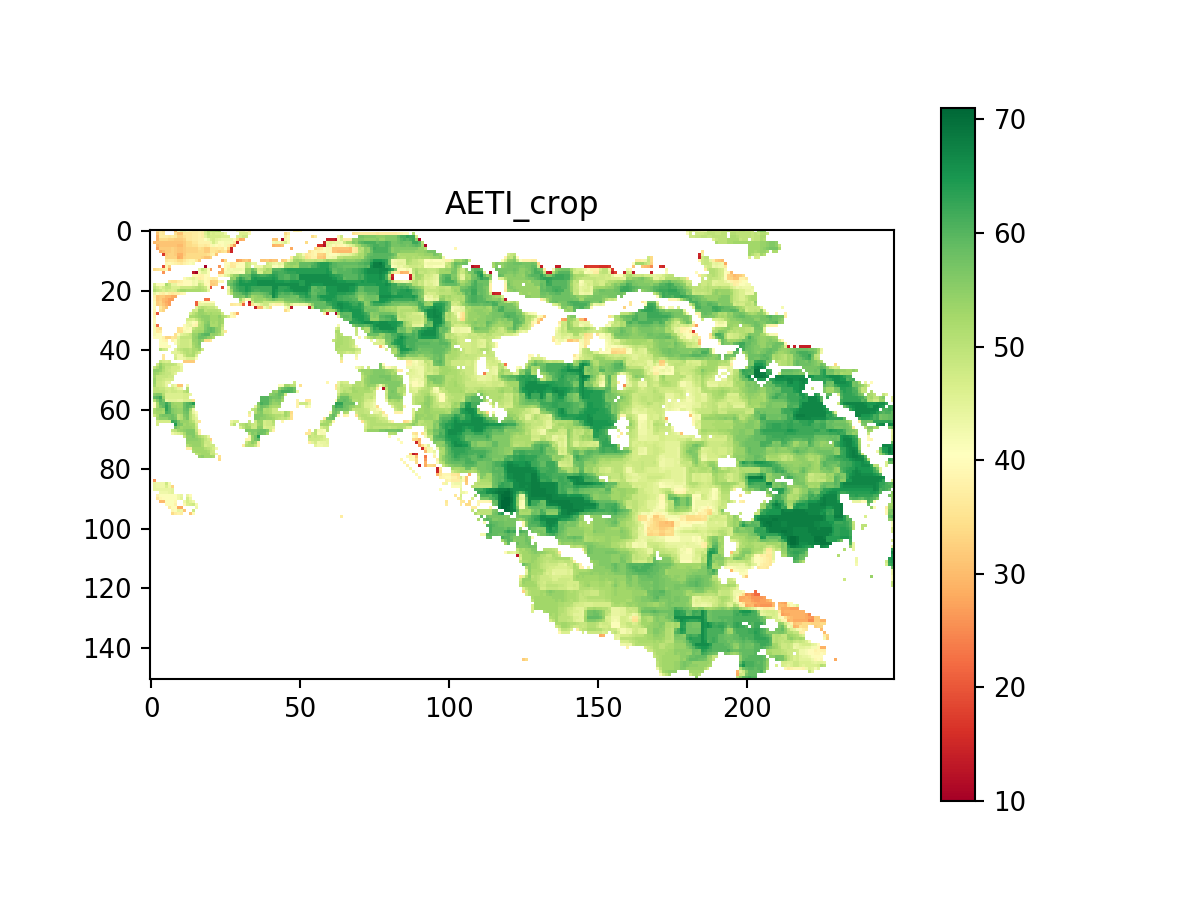

In [29]:
# Plot AETI for irrigated cropland
LCC=OpenAsArray(L2_LCC_tif,nan_values=True)
AETI_crop=np.where((LCC==42),AETI,np.nan) # 41 Cropland, rainfed and 42 is Cropland irrigated or under water management
plt.imshow(AETI_crop, cmap='RdYlGn')    # ((LCC==41)|(LCC==42),AETI,np.nan)
plt.colorbar()                          # 20 shrubland, 30 grassland, 50 builtup, 80 water bodies, 126 Tree cover: open, unknown type
plt.title('AETI_crop')
plt.show()

<IPython.core.display.Javascript object>


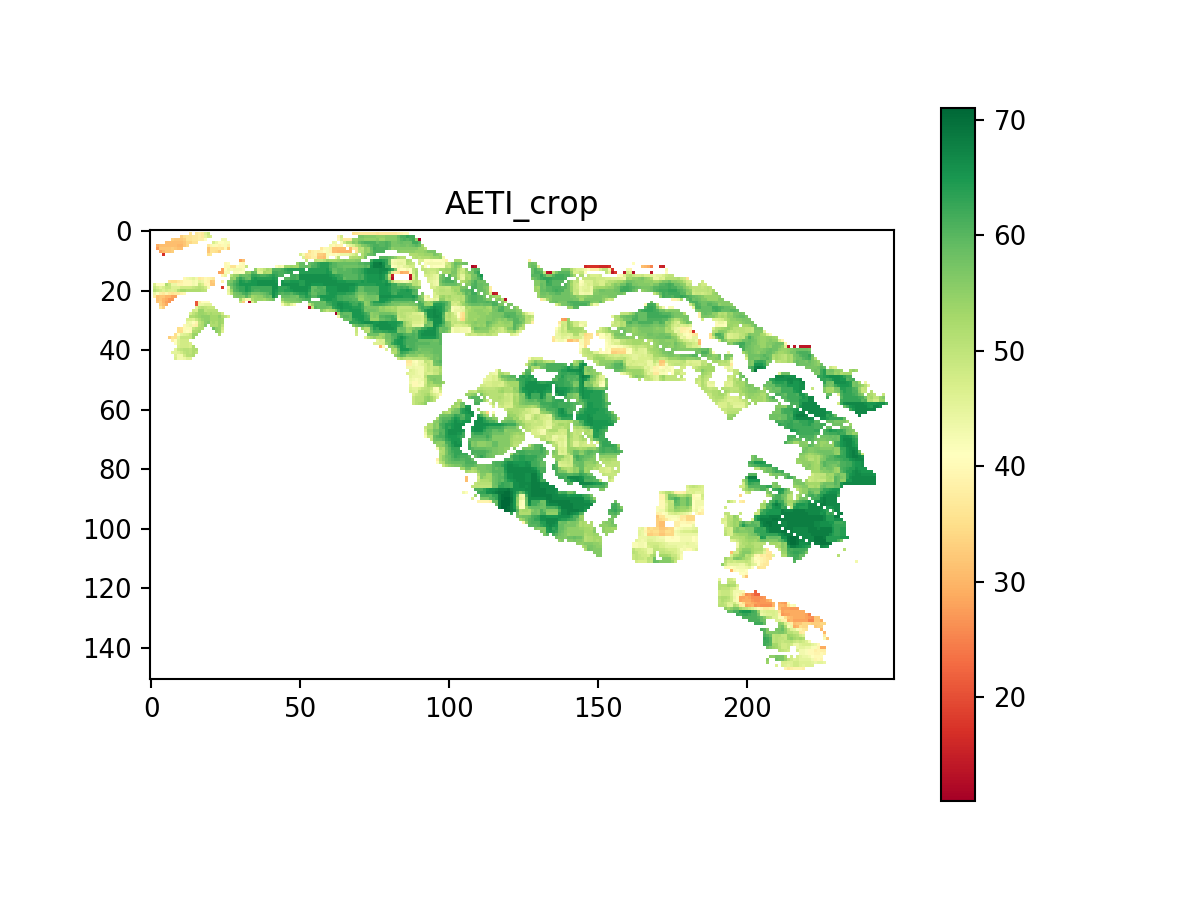

In [30]:
# Plot AETI for irrigated cropland of a particular area
LCC      = OpenAsArray(L2_LCC_tif,nan_values=True)
ProAreaA = OpenAsArray(ProAtif, nan_values=True)

AETI_crop=np.where((LCC==42)& (ProAreaA==1),AETI,np.nan) # 41 Cropland, rainfed and 42 is Cropland irrigated or under water management
plt.imshow(AETI_crop, cmap='RdYlGn')    # ((LCC==41)|(LCC==42),AETI,np.nan)
plt.colorbar()                          # 20 shrubland, 30 grassland, 50 builtup, 80 water bodies, 126 Tree cover: open, unknown type
plt.title('AETI_crop')
plt.show()